In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_absolute_error


%matplotlib inline

# Удаление дубликатов в данных

In [ ]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4],
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,True


In [ ]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [ ]:
data.T.drop_duplicates().T

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [ ]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [ ]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

,0
0,1.2
1,-3.5
2,NaN
3,0.0


In [ ]:
float_data.isna()

,0
0,False
1,False
2,True
3,False


In [ ]:
float_data.notna()

,0
0,True
1,True
2,False
3,True


Удаление данных с пропусками

In [ ]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan],
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [ ]:
data.dropna()

,0,1,2,3


In [ ]:
data.dropna(how="all")

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [ ]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
data.dropna(thresh=2)

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [ ]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,0.744631,NaN,NaN
1,-0.094850,NaN,NaN
2,-0.899991,NaN,0.912931
3,-0.230864,NaN,-0.261629
4,0.517979,-0.615982,0.316116
5,1.441300,1.904341,0.378696
6,-0.570038,-0.332792,0.812919


In [ ]:
df.fillna(0)

,0,1,2
0,0.744631,0.000000,0.000000
1,-0.094850,0.000000,0.000000
2,-0.899991,0.000000,0.912931
3,-0.230864,0.000000,-0.261629
4,0.517979,-0.615982,0.316116
5,1.441300,1.904341,0.378696
6,-0.570038,-0.332792,0.812919


In [ ]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,0.744631,0.500000,0.000000
1,-0.094850,0.500000,0.000000
2,-0.899991,0.500000,0.912931
3,-0.230864,0.500000,-0.261629
4,0.517979,-0.615982,0.316116
5,1.441300,1.904341,0.378696
6,-0.570038,-0.332792,0.812919


In [ ]:
df.fillna(method="bfill")

<ipython-input-42-6bd2f34f2c60>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill")


,0,1,2
0,0.744631,-0.615982,0.912931
1,-0.094850,-0.615982,0.912931
2,-0.899991,-0.615982,0.912931
3,-0.230864,-0.615982,-0.261629
4,0.517979,-0.615982,0.316116
5,1.441300,1.904341,0.378696
6,-0.570038,-0.332792,0.812919


In [ ]:
df.fillna(method="bfill", limit=2)

<ipython-input-43-2b83da338013>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", limit=2)


,0,1,2
0,0.744631,NaN,0.912931
1,-0.094850,NaN,0.912931
2,-0.899991,-0.615982,0.912931
3,-0.230864,-0.615982,-0.261629
4,0.517979,-0.615982,0.316116
5,1.441300,1.904341,0.378696
6,-0.570038,-0.332792,0.812919


In [ ]:
df.fillna(df.mean())

,0,1,2
0,0.744631,0.318522,0.431806
1,-0.094850,0.318522,0.431806
2,-0.899991,0.318522,0.912931
3,-0.230864,0.318522,-0.261629
4,0.517979,-0.615982,0.316116
5,1.441300,1.904341,0.378696
6,-0.570038,-0.332792,0.812919


In [ ]:
df.fillna(df.median())

,0,1,2
0,0.744631,-0.332792,0.378696
1,-0.094850,-0.332792,0.378696
2,-0.899991,-0.332792,0.912931
3,-0.230864,-0.332792,-0.261629
4,0.517979,-0.615982,0.316116
5,1.441300,1.904341,0.378696
6,-0.570038,-0.332792,0.812919


Медиана более устойчива к выбросам

In [ ]:
data_all = []
for i in range(10000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)

data_all = np.array(data_all)

<Axes: >

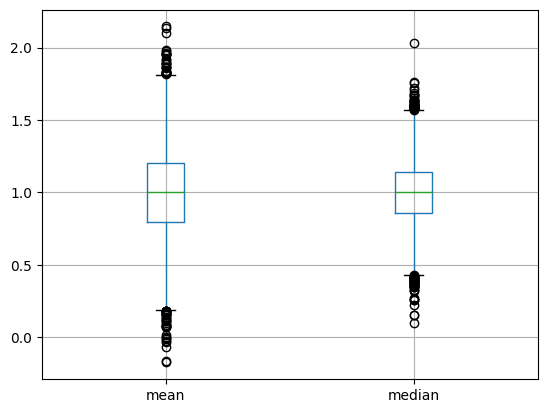

In [ ]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [ ]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

,0,1,2,2 is nan
0,-0.554254,NaN,NaN,1
1,2.044001,NaN,NaN,1
2,-0.406626,NaN,0.328056,0
3,1.049602,NaN,0.622102,0
4,1.905355,-0.260140,0.442188,0
5,-1.217356,-0.355152,0.162520,0
6,0.744739,0.532442,0.946928,0


Замена значений

In [ ]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [ ]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [ ]:
data = pd.Series(["male"]*10 + ["female"]*5)
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [ ]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [ ]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

In [ ]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ...

In [ ]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [ ]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,0,1
7,0,1,0,0,0,0
8,0,0,1,0,0,0
9,0,0,0,1,0,0


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Работа со временем

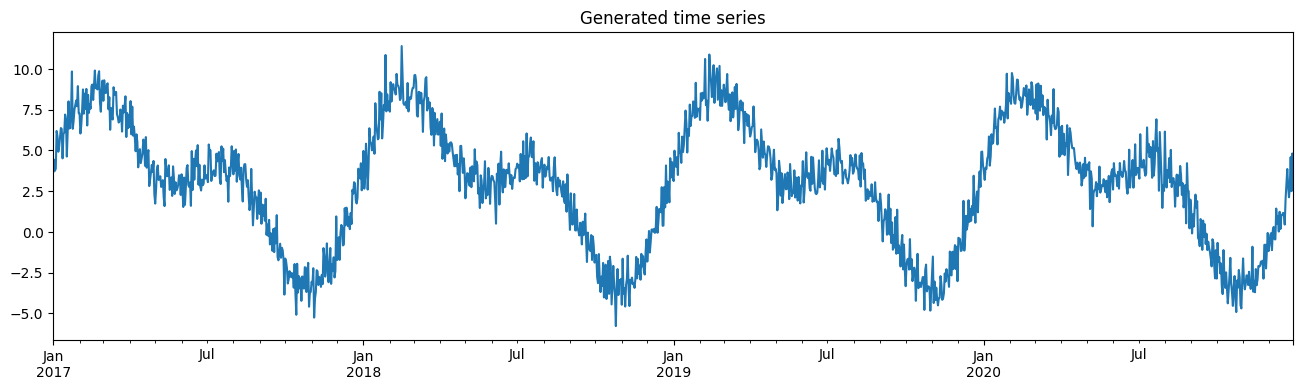

In [ ]:
np.random.seed(12345)

range_of_dates = pd.date_range(start="2017-01-01", end="2020-12-30")
X = pd.DataFrame(index=range_of_dates)

X["day_nr"] = range(len(X))
X["day_of_year"] = X.index.day_of_year

signal_1 = 3 + 4 * np.sin(X["day_nr"] / 365 * 2 * np.pi)
signal_2 = 3 * np.sin(X["day_nr"] / 365 * 4 * np.pi + 365/2)
noise = np.random.normal(0, 0.85, len(X))

y = signal_1 + signal_2 + noise

y.plot(figsize=(16,4), title="Generated time series");

In [ ]:
X

,day_nr,day_of_year
2017-01-01,0,1
2017-01-02,1,2
2017-01-03,2,3
2017-01-04,3,4
2017-01-05,4,5
...,...,...
2020-12-26,1455,361
2020-12-27,1456,362
2020-12-28,1457,363
2020-12-29,1458,364


In [ ]:
results_df = y.to_frame()
results_df.columns = ["actuals"]

In [ ]:
TRAIN_END = 3 * 365

## Подход 1 - категориальные переменные

In [ ]:
X_1 = pd.DataFrame(data=pd.get_dummies(X.index.month, drop_first=True, prefix="month"))
X_1.index = X.index
X_1

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2017-01-01,False,False,False,False,False,False,False,False,False,False,False
2017-01-02,False,False,False,False,False,False,False,False,False,False,False
2017-01-03,False,False,False,False,False,False,False,False,False,False,False
2017-01-04,False,False,False,False,False,False,False,False,False,False,False
2017-01-05,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,False,False,False,False,False,False,False,False,False,False,True
2020-12-27,False,False,False,False,False,False,False,False,False,False,True
2020-12-28,False,False,False,False,False,False,False,False,False,False,True
2020-12-29,False,False,False,False,False,False,False,False,False,False,True


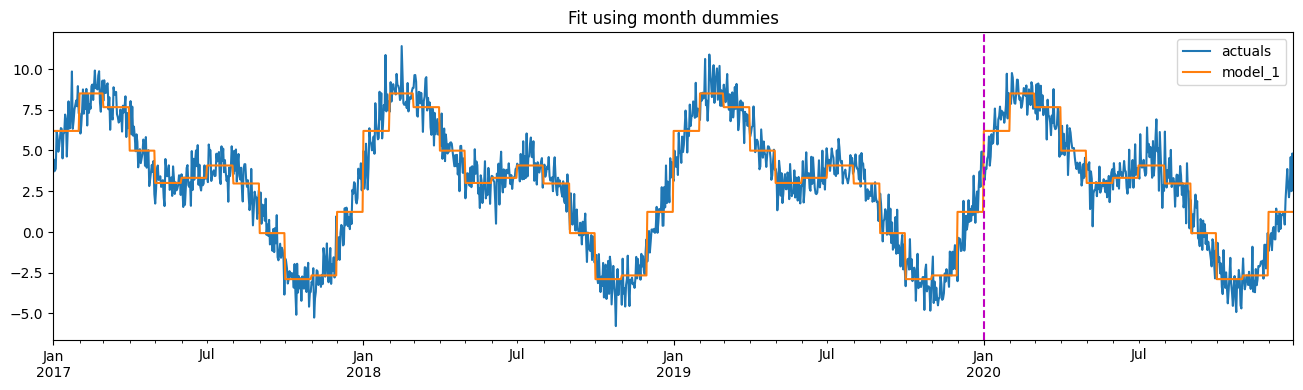

In [ ]:
model_1 = LinearRegression().fit(X_1.iloc[:TRAIN_END], y.iloc[:TRAIN_END])

results_df["model_1"] = model_1.predict(X_1)
results_df[["actuals", "model_1"]].plot(figsize=(16,4), title="Fit using month dummies")

plt.axvline(date(2020, 1, 1), c="m", linestyle="--");

In [ ]:
print(model_1.score(X_1.iloc[:TRAIN_END], y.iloc[:TRAIN_END]))
print(model_1.score(X_1.iloc[TRAIN_END + 1:], y.iloc[TRAIN_END + 1:]))

0.9032966594007233
0.9013303218307307


## Подход 2 - циклическое кодирование с синусом/косинусом

In [ ]:
def sin_transformer(period):
 return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
 return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

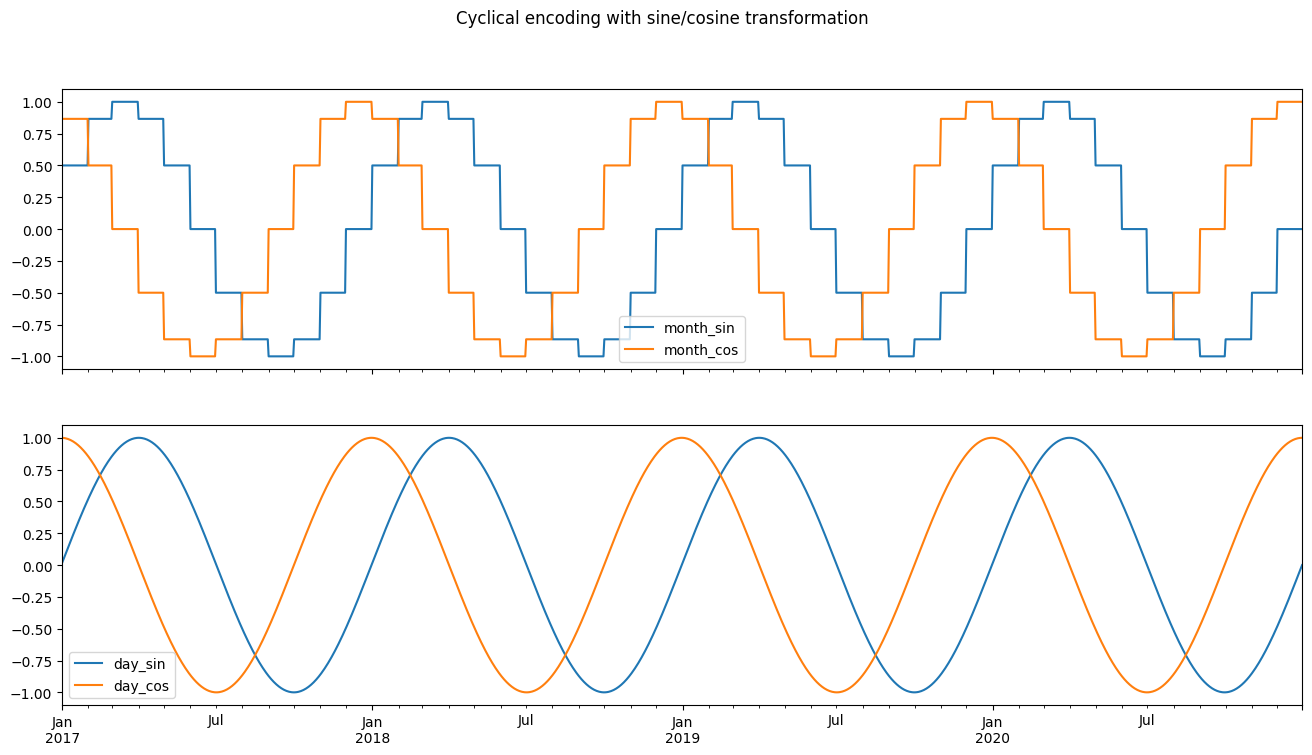

In [ ]:
X_2 = X.copy()
X_2["month"] = X_2.index.month

X_2["month_sin"] = sin_transformer(12).fit_transform(X_2)["month"]
X_2["month_cos"] = cos_transformer(12).fit_transform(X_2)["month"]

X_2["day_sin"] = sin_transformer(365).fit_transform(X_2)["day_of_year"]
X_2["day_cos"] = cos_transformer(365).fit_transform(X_2)["day_of_year"]

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(16,8))
X_2[["month_sin", "month_cos"]].plot(ax=ax[0])
X_2[["day_sin", "day_cos"]].plot(ax=ax[1])
plt.suptitle("Cyclical encoding with sine/cosine transformation");

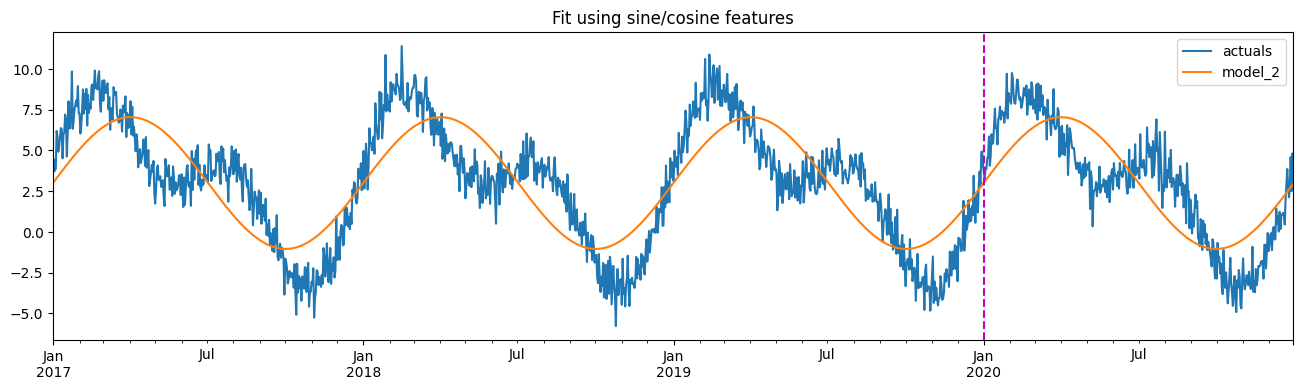

In [ ]:
X_2_daily = X_2[["day_sin", "day_cos"]]

model_2 = LinearRegression().fit(X_2_daily.iloc[:TRAIN_END],
 y.iloc[:TRAIN_END])

results_df["model_2"] = model_2.predict(X_2_daily)
results_df[["actuals", "model_2"]].plot(figsize=(16,4),
 title="Fit using sine/cosine features")
plt.axvline(date(2020, 1, 1), c="m", linestyle="--");

In [ ]:
print(model_2.score(X_2_daily.iloc[:TRAIN_END], y.iloc[:TRAIN_END]))
print(model_2.score(X_2_daily.iloc[TRAIN_END + 1:], y.iloc[TRAIN_END + 1:]))

0.6100625066720329
0.5899965166638506


In [ ]:
X_concat = pd.concat([X_1, X_2_daily], axis=1)

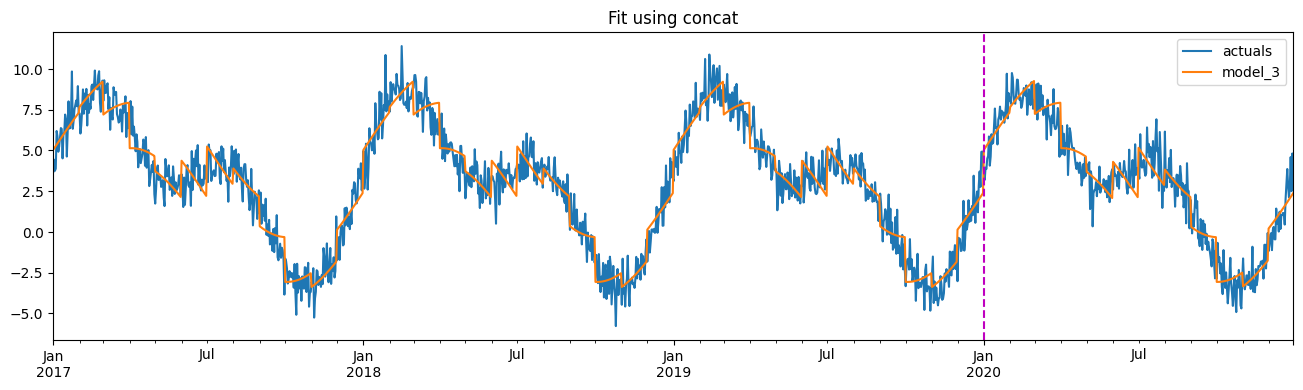

In [ ]:
model_concat = LinearRegression().fit(X_concat.iloc[:TRAIN_END], y.iloc[:TRAIN_END])

results_df["model_3"] = model_concat.predict(X_concat)
results_df[["actuals", "model_3"]].plot(figsize=(16,4), title="Fit using concat")
plt.axvline(date(2020, 1, 1), c="m", linestyle="--");

In [ ]:
print(model_concat.score(X_concat.iloc[:TRAIN_END], y.iloc[:TRAIN_END]))
print(model_concat.score(X_concat.iloc[TRAIN_END + 1:], y.iloc[TRAIN_END + 1:]))

0.9211414853927441
0.9145793856126094


## Подход 3 - радиальные базисные функции

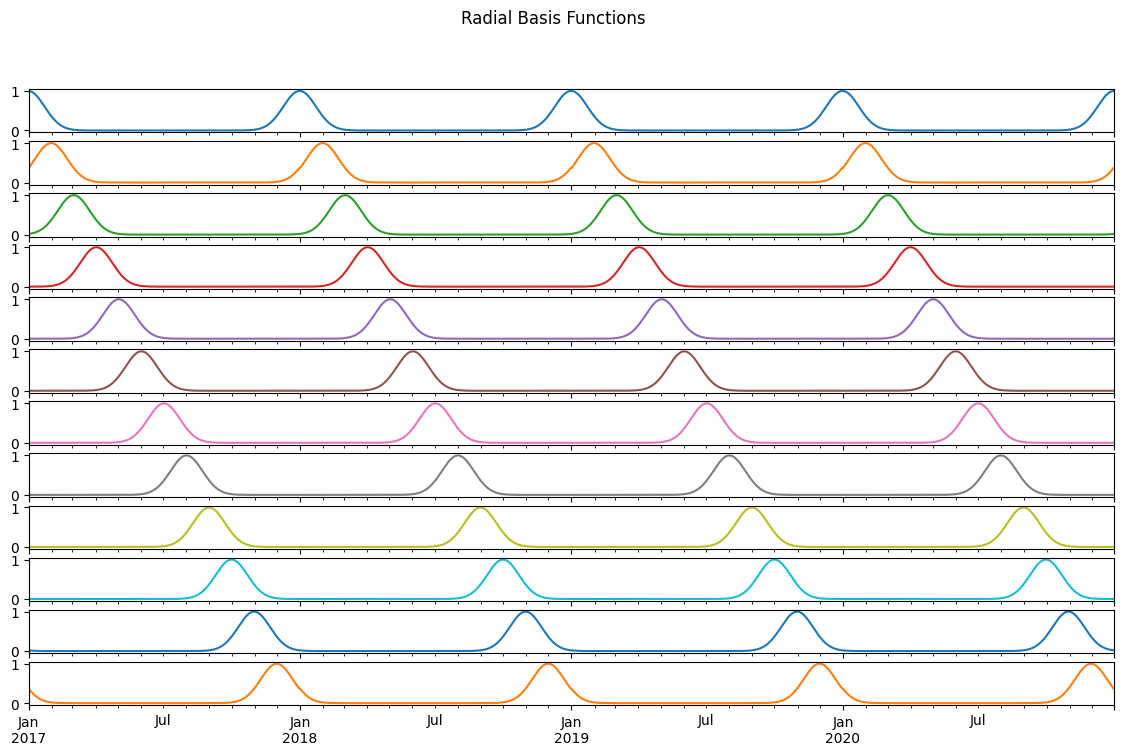

In [ ]:
rbf = RepeatingBasisFunction(n_periods=12,
                             column="day_of_year",
                             input_range=(1,365),
                             remainder="drop")
rbf.fit(X)
X_3 = pd.DataFrame(index=X.index, data=rbf.transform(X))

X_3.plot(subplots=True, figsize=(14, 8), sharex=True,
         title="Radial Basis Functions", legend=False);

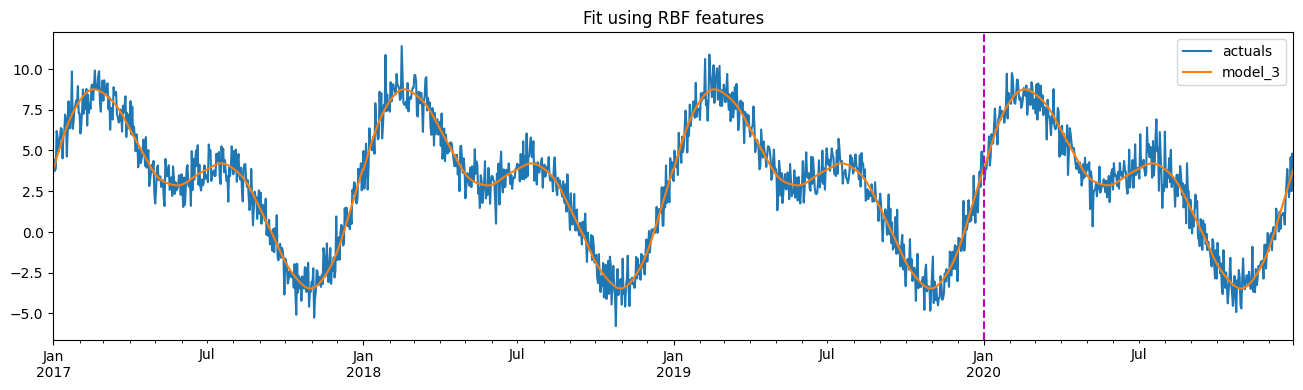

In [ ]:
model_3 = LinearRegression().fit(X_3.iloc[:TRAIN_END],
                                 y.iloc[:TRAIN_END])

results_df["model_3"] = model_3.predict(X_3)
results_df[["actuals", "model_3"]].plot(figsize=(16,4),
                                        title="Fit using RBF features")
plt.axvline(date(2020, 1, 1), c="m", linestyle="--");

In [ ]:
print(model_3.score(X_3.iloc[:TRAIN_END], y.iloc[:TRAIN_END]))
print(model_3.score(X_3.iloc[TRAIN_END + 1:], y.iloc[TRAIN_END + 1:]))

0.948396987578611
0.9459626423586653


# Создание новых признаков

Полиномиальные признаки

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

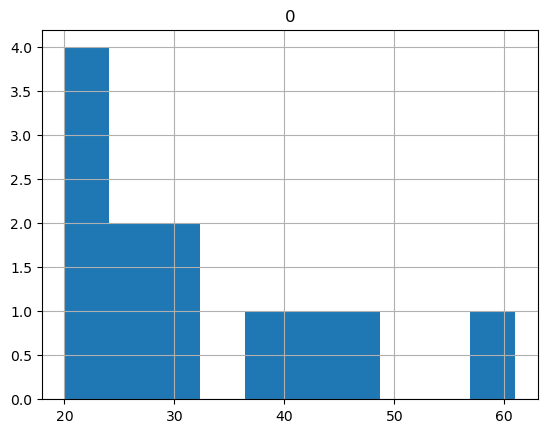

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [ ]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [ ]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

C:\Users\kotenok\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

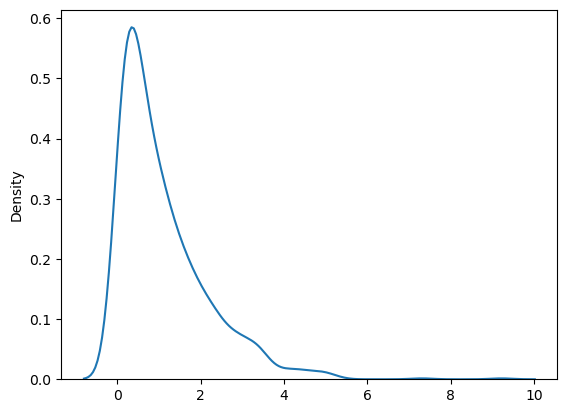

In [ ]:
from scipy. stats import boxcox

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

C:\Users\kotenok\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

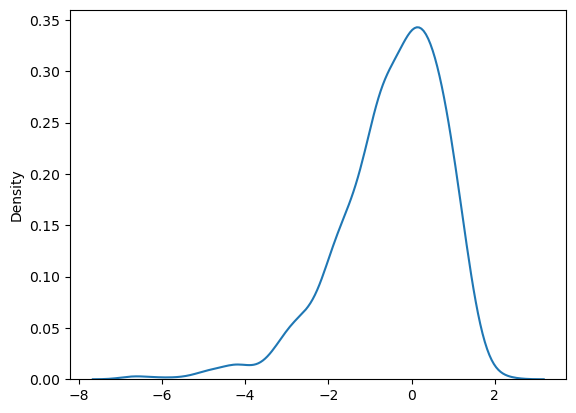

In [ ]:
transformed_data = np.log(data)
sns.distplot(transformed_data, hist=False, kde=True)

C:\Users\kotenok\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

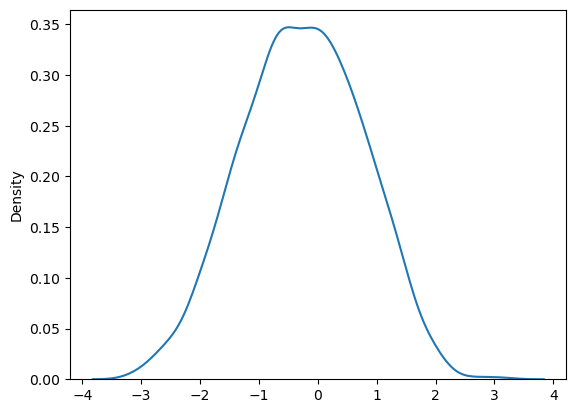

In [ ]:
transformed_data, best_lambda = boxcox(data)

sns.distplot(transformed_data, hist=False , kde=True)

In [ ]:
best_lambda

0.2762186885938159

# Домашнее задание

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

Задача: добиться наименьшего MSE на test.

## Baseline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
train_X

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_back-wheel-base,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male
22607,31995,3,-1.0,11636,9.5,-1.0,0,4,4,1997,...,1415.0,4,2,13,50.0,2000.0,16,3,0,1
36531,51796,8,-1.0,31764,9.0,-1.0,0,4,0,1990,...,1310.0,1,2,13,48.0,1996.0,23,3,0,0
24048,34069,8,-1.0,2773,8.8,6.8,0,4,4,2009,...,1558.0,4,1,13,56.0,2012.0,10,3,0,1
34819,49346,3,-1.0,52039,14.0,5.3,0,4,5,2015,...,1590.0,4,2,13,56.0,2017.0,16,3,0,0
1328,1890,3,-1.0,20689,18.0,7.5,0,5,5,2004,...,1560.0,4,2,13,70.0,2009.0,28,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,8939,6,-1.0,42729,16.5,4.7,0,4,5,2017,...,1630.0,4,2,13,68.0,-1.0,10,3,0,1
11284,16109,0,-1.0,46093,8.1,-1.0,3,7,0,1987,...,1486.0,4,2,13,82.0,1996.0,34,3,0,1
38158,54067,3,-1.0,48819,10.0,7.6,0,4,2,2018,...,1636.0,4,2,13,62.0,-1.0,26,3,0,1
860,1217,10,-1.0,9346,22.4,-1.0,0,4,6,1992,...,1460.0,1,2,13,50.0,1995.0,16,3,0,1


In [11]:
reg = LinearRegression().fit(train_X, train_y)

In [13]:
reg.score(train_X, train_y)

0.4555406785040048

In [15]:
reg.score(test_X, test_y)

0.46462439877923445

In [14]:
mean_squared_error(reg.predict(train_X), train_y)

29840.1212508653

In [16]:
mean_squared_error(reg.predict(test_X), test_y)

31021.02439985452

In [62]:
# 2. Удаление дубликатов
duplicates_before = df.duplicated().sum()
df.drop_duplicates(inplace=True)
duplicates_after = df.duplicated().sum()
print("Шаг 2. Удалены дубликаты: было {duplicates_before}, стало {duplicates_after}.")

Шаг 2. Удалены дубликаты: было {duplicates_before}, стало {duplicates_after}.


In [61]:
# 3   обработка пропусков
#    Сначала найдём, в каких столбцах есть -1, и посчитаем, сколько их
missing_counts = (df == -1).sum()
print("Столбцы с числом '-1':\n", missing_counts[missing_counts > 0])

Столбцы с числом '-1':
 Series([], dtype: int64)


In [23]:
# Удалим столбцы, где пропусков слишком много (например, более 90%)
threshold = 0.9 * len(df)
cols_to_drop = []
for col in df.columns:
    if (df[col] == -1).sum() > threshold:
        cols_to_drop.append(col)

In [60]:
df.drop(columns=cols_to_drop, inplace=True)
print("Шаг 3. Удаляем столбцы с >90% пропусков: {cols_to_drop}")
print("Новый размер датасета:", df.shape)

Шаг 3. Удаляем столбцы с >90% пропусков: {cols_to_drop}
Новый размер датасета: (43245, 30)


In [52]:
#   Остальные пропуски (-1) заменим медианой по столбцу
for col in df.columns:
    if (df[col] == -1).any() and col != 'target':
        # Берём медиану только по «реальным» данным (не -1)
        median_val = df.loc[df[col] != -1, col].median()
        df.loc[df[col] == -1, col] = median_val


In [59]:
# 4. Кодирование категориальных признаков с помощью onrhotencpder

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

if 'target' not in df.columns:
    raise ValueError("Не найден столбец 'target'")


In [58]:
# выделим целевую переменную
y = df['target'].copy()
X = df.drop(columns=['target']).copy()

unique_counts = X.nunique()
cat_cols = unique_counts[unique_counts <= 10].index.tolist()

print("Шаг 4. Признаки для One-Hot Encoding:", cat_cols)

Шаг 4. Признаки для One-Hot Encoding: ['cylinders-order', 'engine-feeding', 'engine-type', 'gear-type', 'supply-system', 'valvetrain', 'configurations_front-brake', 'configurations_safety-rating', 'models_group', 'models_light-and-commercial']


In [35]:
# Собираем ColumnTransformer:
encoder = OneHotEncoder(drop='first', sparse_output=False)
ct_ohe = ColumnTransformer(
    [("ohe", encoder, cat_cols)],
    remainder='passthrough'
)


X_ohe_array = ct_ohe.fit_transform(X)


In [38]:

ohe_feature_names = ct_ohe.named_transformers_['ohe'].get_feature_names_out(cat_cols)


In [39]:

ohe_feature_names = ct_ohe.named_transformers_['ohe'].get_feature_names_out(cat_cols)

# Соберём итоговые названия: сначала OHE-колонки, затем "passthrough"
passthrough_cols = [col for col in X.columns if col not in cat_cols]
final_ohe_cols = list(ohe_feature_names) + passthrough_cols

X_ohe = pd.DataFrame(X_ohe_array, columns=final_ohe_cols, index=X.index)

print("Шаг 4. Размер X после OHE:", X_ohe.shape)

Шаг 4. Размер X после OHE: (43245, 57)


In [53]:
# 5 Создание полиномиальных признаков (только для числовых столбцов, кроме бинарных)
from sklearn.preprocessing import PolynomialFeatures

# Сначала выделим столбцы, которые мы хотим расширить полиномиально. мсключим колонки, где все значения 0/1.
numeric_cols = []
for col in X_ohe.columns:
    if pd.api.types.is_numeric_dtype(X_ohe[col]):
        unique_vals = np.sort(X_ohe[col].unique())
        # Проверим, не является ли признак строго бинарным (0,1)
        # если unique_vals = [0,1], то пропустим
        if not (len(unique_vals) == 2 and np.array_equal(unique_vals, [0,1])):
            numeric_cols.append(col)

print("Шаг 5. Числовые столбцы для полиномиального расширения:", numeric_cols)

Шаг 5. Числовые столбцы для полиномиального расширения: ['index', 'back-suspension', 'charge-time', 'compression', 'consumption-mixed', 'cylinders-value', 'engine-start', 'engine-stop', 'luxury', 'max-speed', 'valves', 'weight', 'configurations_auto-premiere', 'configurations_back-wheel-base', 'configurations_seats', 'configurations_tank-volume', 'supergen_year-stop', 'models_country-from', 'models_male']


In [51]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_array = poly.fit_transform(X_ohe[numeric_cols])
poly_feature_names = poly.get_feature_names_out(numeric_cols)

X_poly_numeric = pd.DataFrame(X_poly_array, columns=poly_feature_names, index=X_ohe.index)

#Добавим остальные столбцы (которые не расширяем), как есть
other_cols = [col for col in X_ohe.columns if col not in numeric_cols]
X_poly = pd.concat([X_poly_numeric, X_ohe[other_cols]], axis=1)

print("Шаг 5. Размер X после полиномиального расширения:", X_poly.shape)

Шаг 5. Размер X после полиномиального расширения: (43245, 247)


In [56]:
 # 6 Масштабирование числовых признаков (кроме бинарных)
from sklearn.preprocessing import StandardScaler

scale_cols = []
for col in X_poly.columns:
    if pd.api.types.is_numeric_dtype(X_poly[col]):
        unique_vals = np.sort(X_poly[col].unique())
        # Исключим бинарные колонки (0,1)
        if not (len(unique_vals) == 2 and np.array_equal(unique_vals, [0,1])):
            scale_cols.append(col)

scaler = StandardScaler()
X_poly[scale_cols] = scaler.fit_transform(X_poly[scale_cols])

print("Шаг 6. Масштабирование завершено.")
print("Итоговая размерность X_poly:", X_poly.shape)

Шаг 6. Масштабирование завершено.
Итоговая размерность X_poly: (43245, 247)


In [55]:
# 7. разбиение на train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)
print("Шаг 7. Данные разбиты на train/test.")
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Шаг 7. Данные разбиты на train/test.
Train shape: (34596, 247) (34596,)
Test shape: (8649, 247) (8649,)


In [57]:
# 8 обучение базовой модели и оценка MSE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Шаг 8. linearRegression обучена.")
print(f"MSE на train: {mse_train:.2f}")
print(f"MSE на test : {mse_test:.2f}")

Шаг 8. linearRegression обучена.
MSE на train: 18409.75
MSE на test : 18762.35
